## Get bandwidth from cv part files

In [1]:
#%matplotlib notebook

import cPickle as pickle
import glob
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os.path
from matplotlib import ticker

from kde_classes import Model, KDE

Welcome to JupyROOT 6.14/04


Gamma: 1.5; CV: [([0.15, 0.44, 0.56], -1.9467872, 0.)]
Gamma: 2.0; CV: [([0.11, 0.3 , 0.22], -1.714236, 0.)]
Gamma: 2.1; CV: [([0.11, 0.3 , 0.22], -1.6543146, 0.)]
Gamma: 2.2; CV: [([0.1 , 0.3 , 0.23], -1.5938997, 0.)]
Gamma: 2.3; CV: [([0.1 , 0.26, 0.2 ], -1.5339022, 0.)]
Gamma: 2.4; CV: [([0.09, 0.26, 0.17], -1.4745038, 0.)]
Gamma: 2.5; CV: [([0.1 , 0.3 , 0.13], -1.4162319, 0.)]
Gamma: 2.6; CV: [([0.1 , 0.3 , 0.13], -1.3595816, 0.)]
Gamma: 2.7; CV: [([0.1 , 0.3 , 0.13], -1.3050824, 0.)]
Gamma: 2.8; CV: [([0.11, 0.28, 0.09], -1.2533023, 0.)]
Gamma: 2.9; CV: [([0.11, 0.26, 0.09], -1.2040813, 0.)]
Gamma: 3.0; CV: [([0.09, 0.28, 0.09], -1.1580703, 0.)]


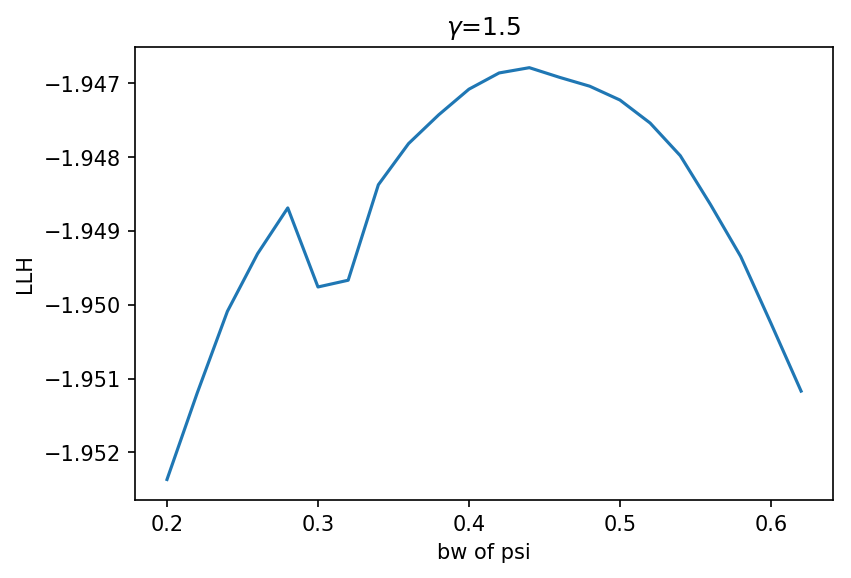

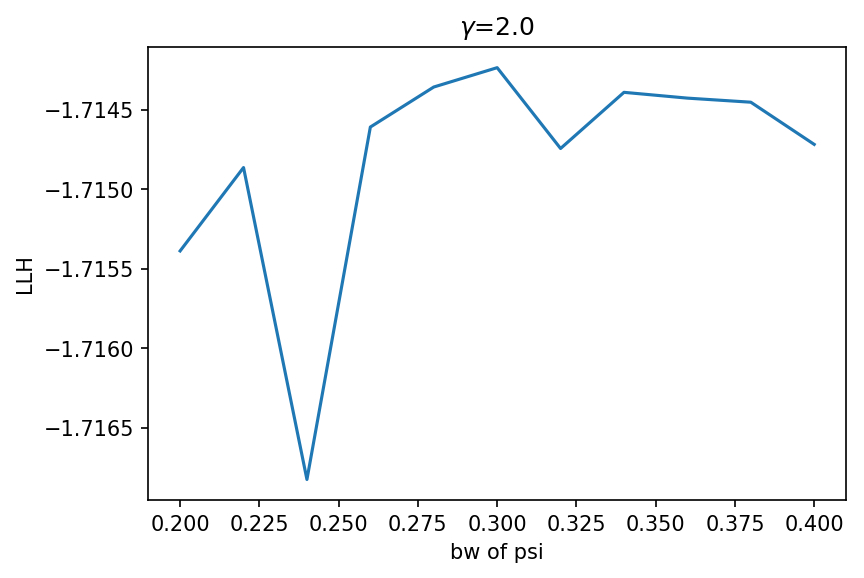

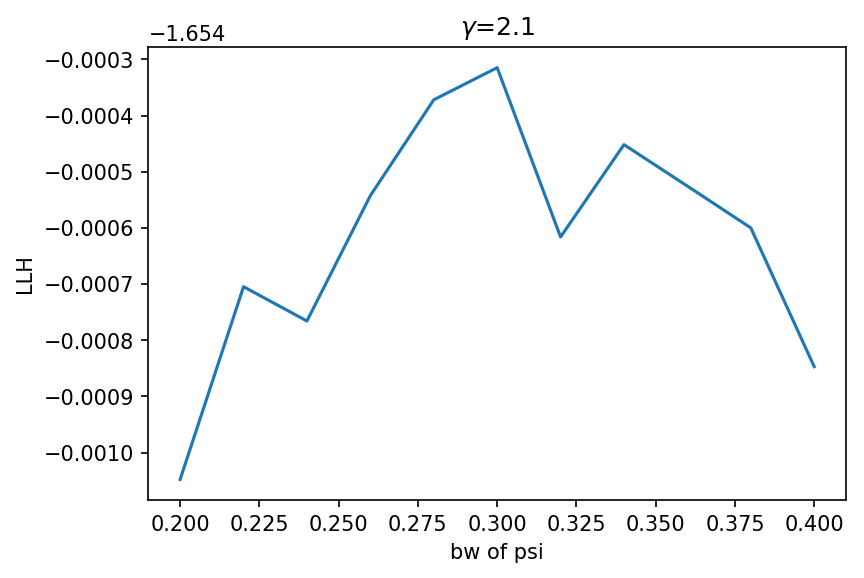

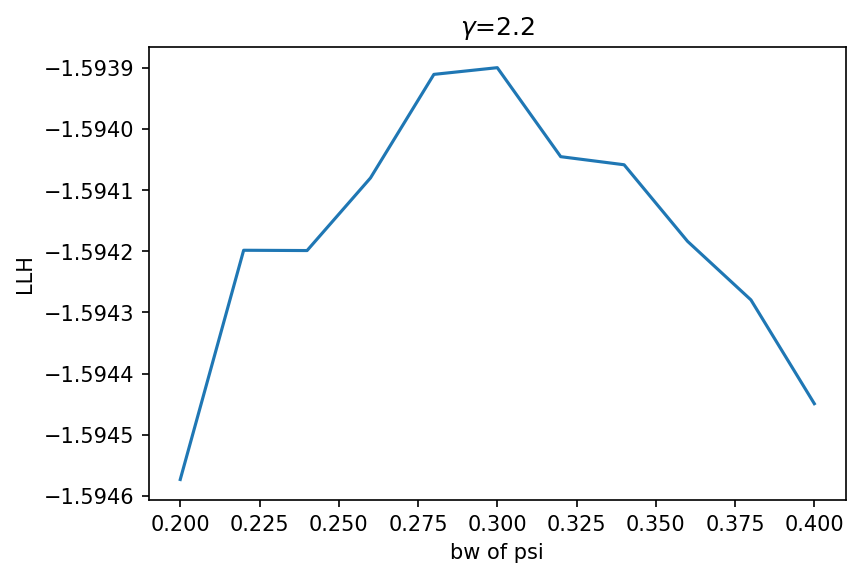

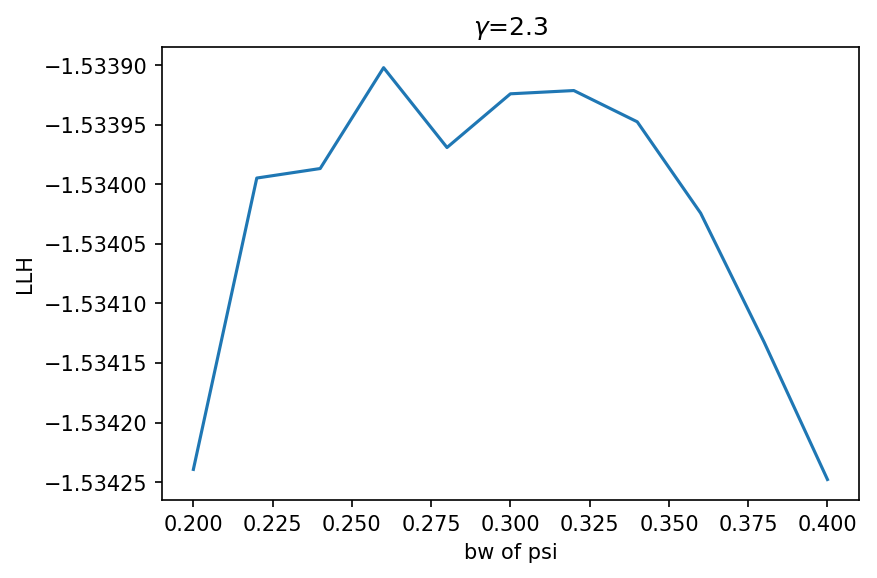

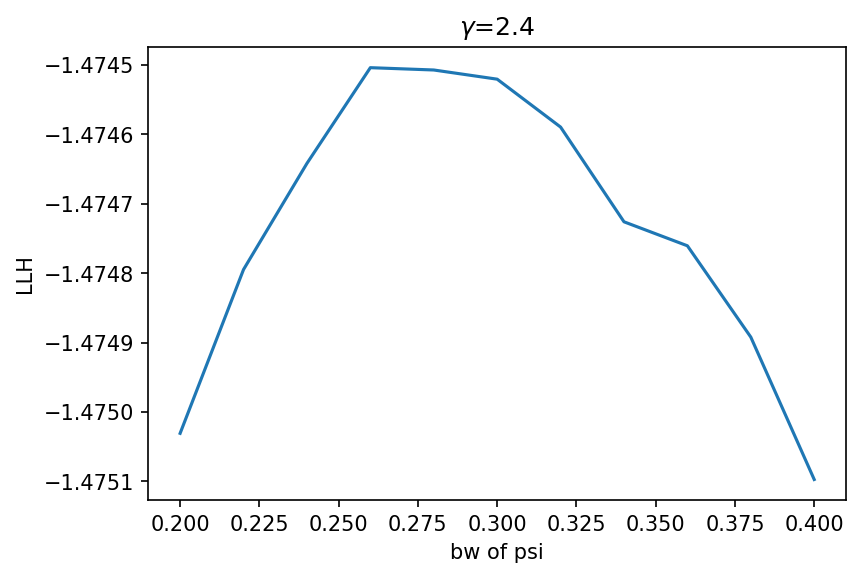

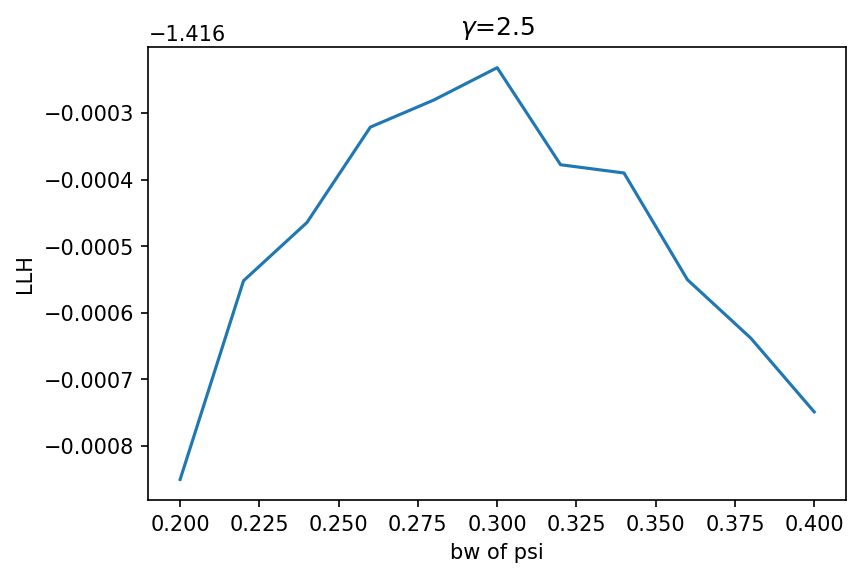

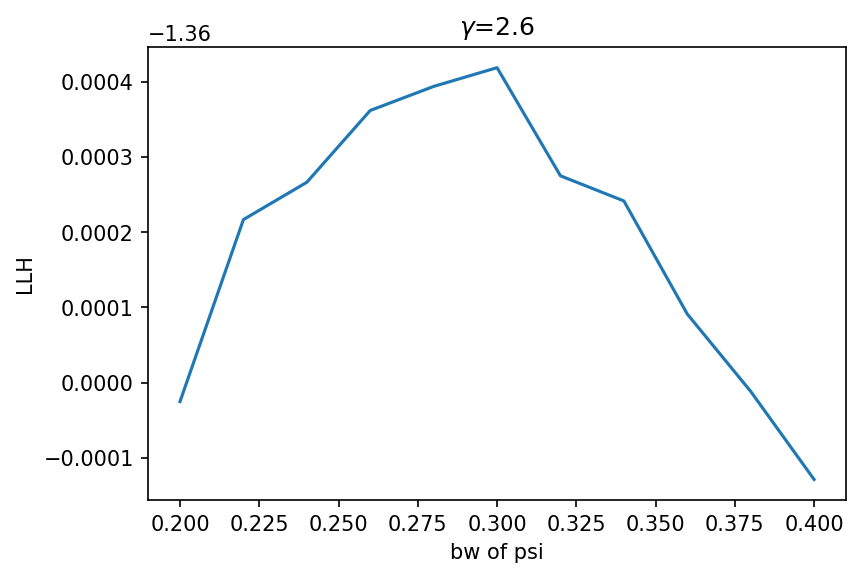

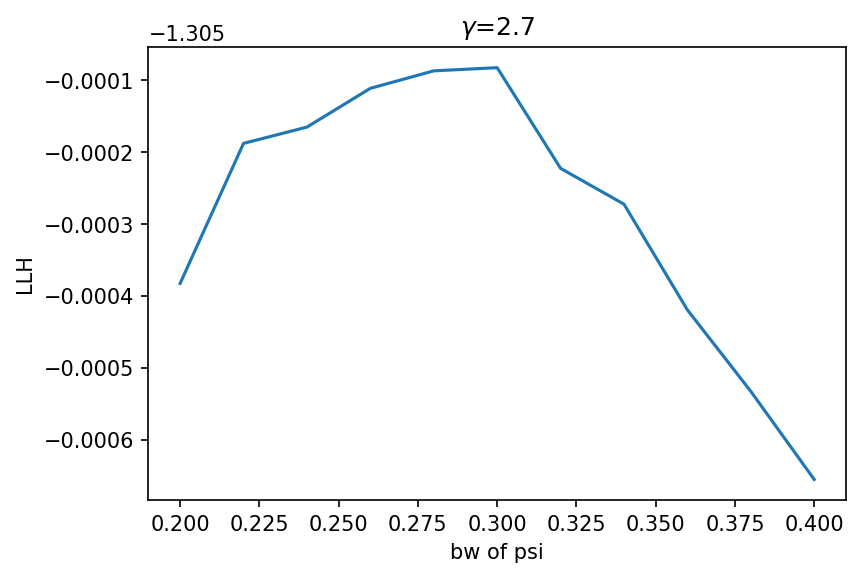

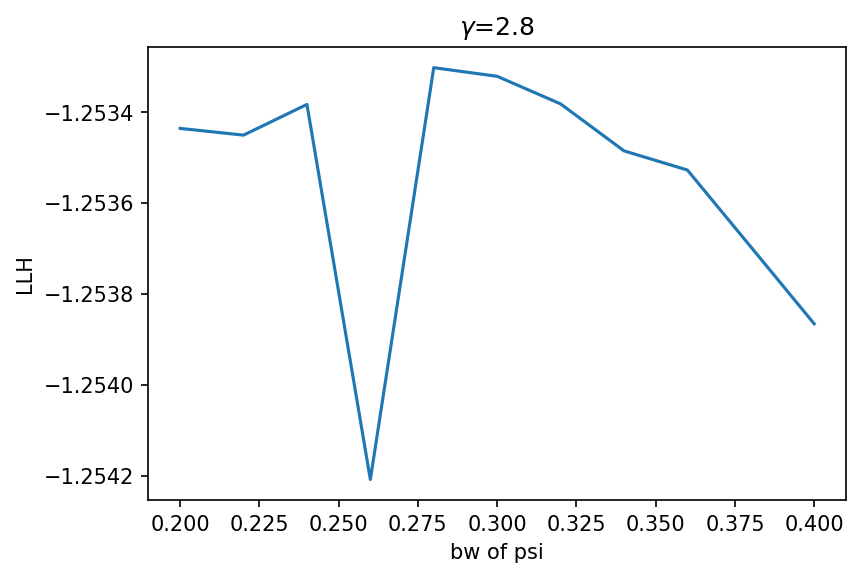

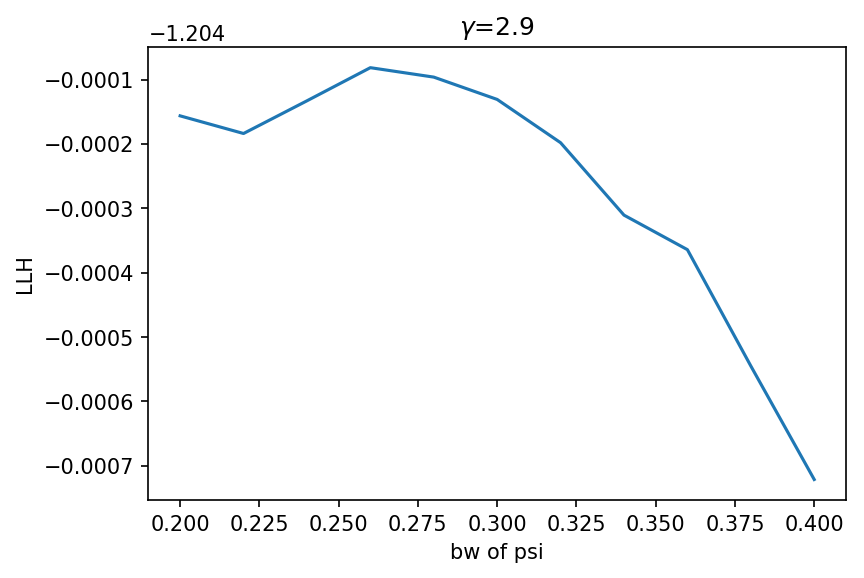

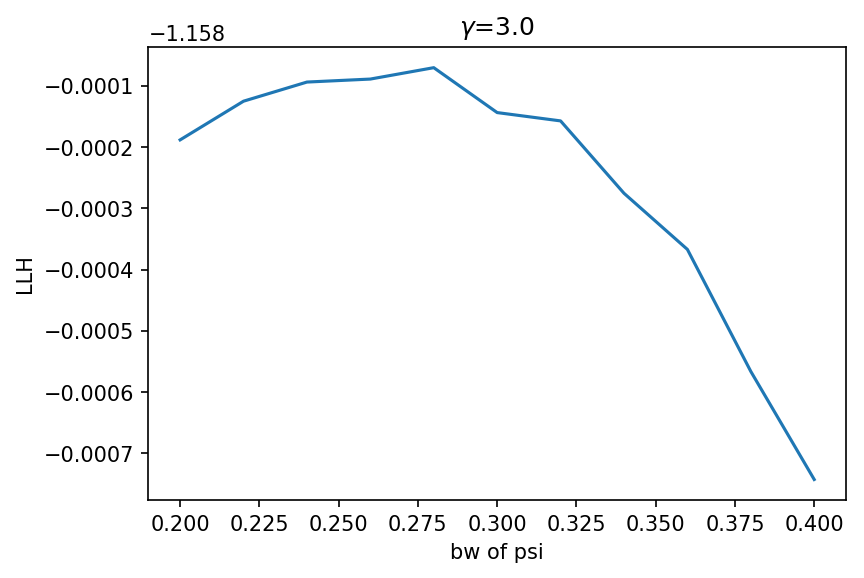

In [9]:
#gammas = np.linspace(2.0, 3.0, 11)
gammas = np.concatenate(([1.5], np.linspace(2.0, 3.0, 11)))
module = 'sig_psi_E'
model = Model(module, mc=None, weighting='plotter_wkde')
kde = KDE(model)

for gamma in gammas:
    cv_files = glob.glob('output/{module}/adaptive_kd_plotter_wkde_gamma_{gamma}_phi0_1.0/cv/cv_*.npy'.format(module=module, gamma=gamma))
    #cv_files = glob.glob('output/sig_psi_E/old/adaptive/cv/cv_*.npy')

    cv_results_split = np.array([], dtype=kde.cv_result_dtype)
    #cv_results_split = np.array([], dtype=np.load(cv_files[0]).dtype)

    for cv_file in cv_files:
        cv_result_split = np.load(cv_file)
        #print(cv_result_split)
        cv_results_split = np.append(cv_results_split, cv_result_split)

    # Gather splitted cv results by calculating average values.
    arr, unique_index = np.unique(cv_results_split['bandwidth'], return_index=True,
                                  axis=0)
    cv_results = cv_results_split[unique_index]
    for i, cv_result in enumerate(cv_results):
        matches = cv_results_split[np.all(
            cv_results_split['bandwidth'] == cv_result['bandwidth'], axis=1)]
        cv_results['LLH'][i] = np.average(matches['LLH'])
        cv_results['Zeros'][i] = np.average(matches['Zeros'])
    # cv_results = cv_results_split
    cv_results_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]
    print("Gamma: {}; CV: {}".format(gamma, cv_results_max_LLH))
    bandwidth = cv_results_max_LLH['bandwidth'][0]

#     plt.figure(dpi=150)
#     plt.tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 1],
#                     cv_results['LLH'], 50)
#     plt.colorbar()
#     plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
#     plt.title('$\gamma$={}'.format(gamma))
#     plt.legend()

    plt.figure(dpi=150)
    plt.plot(cv_results['bandwidth'][:, 1], cv_results['LLH'])
    plt.title('$\gamma$={}'.format(gamma))
    plt.xlabel('bw of psi')
    plt.ylabel('LLH')

In [10]:
#np.set_printoptions(threshold=np.inf)
print(cv_results)
print(cv_results_max_LLH)
bandwidth = cv_results_max_LLH['bandwidth']

[([0.15, 0.2 , 0.56], -1.9523661, 0.) ([0.15, 0.22, 0.56], -1.9511955, 0.)
 ([0.15, 0.24, 0.56], -1.9500887, 0.) ([0.15, 0.26, 0.56], -1.9493072, 0.)
 ([0.15, 0.28, 0.56], -1.948687 , 0.) ([0.15, 0.3 , 0.56], -1.9497582, 0.)
 ([0.15, 0.32, 0.56], -1.9496667, 0.) ([0.15, 0.34, 0.56], -1.9483734, 0.)
 ([0.15, 0.36, 0.56], -1.9478157, 0.) ([0.15, 0.38, 0.56], -1.9474255, 0.)
 ([0.15, 0.4 , 0.56], -1.9470787, 0.)]
[([0.15, 0.4 , 0.56], -1.9470787, 0.)]
[0.15 0.4  0.56]


In [ ]:
plt.figure(dpi=150)
plt.plot(cv_results['bandwidth'][:, 1], cv_results['LLH'])
plt.title('$\gamma$={}'.format(gamma))
plt.xlabel('bw of psi')
plt.ylabel('LLH')

## Plot contours of CV

In [ ]:
plt.figure(dpi=150)
plt.tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 1],
                cv_results['LLH'], 50)
plt.colorbar()
plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
plt.legend()
plt.title('$\gamma$={}'.format(gamma))
plt.xlabel('bw of log(sigma_pull_corrected)')
plt.ylabel('bw of log_e')

In [ ]:
from scipy.interpolate import griddata

x = cv_results['bandwidth'][:, 0]
y = cv_results['bandwidth'][:, 1]
z =  cv_results['LLH']

xi = np.unique(x)
yi = np.unique(y)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')

plt.figure(dpi=150)
plt.contourf(xi, yi, zi, 20)
plt.colorbar()
plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
plt.legend()

## dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields names

In [ ]:
mc = np.load('/home/ge56lag/Data/dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields.npy')
mc.dtype.names

In [ ]:
np.linspace(0.01, 0.25, 5)

In [ ]:
np.geomspace(0.01, 0.25, 5)

In [ ]:
import cPickle as pickle
import glob
import itertools
import numpy as np
import os.path

from kde_classes import Model, KDE

model = Model('dec', mc=None, weighting=None)
kde = KDE(model)

cv_files = glob.glob('output/dec/temp/cv_*.npy')
cv_results_split = np.array([], dtype=kde.cv_result_dtype)
#cv_results = np.array([], dtype=kde.cv_result_dtype)

for cv_file in cv_files:
    cv_result_split = np.load(cv_file)
    cv_results_split = np.append(cv_results_split, cv_result_split)

# Gather splitted cv results by calculating average values.
arr, unique_index = np.unique(cv_results_split['bandwidth'], return_index=True,
                              axis=0)
cv_results = cv_results_split[unique_index]
for i, cv_result in enumerate(cv_results):
    matches = cv_results_split[np.all(
        cv_results_split['bandwidth'] == cv_result['bandwidth'], axis=1)]
    cv_results['LLH'][i] = np.average(matches['LLH'])
    cv_results['Zeros'][i] = np.average(matches['Zeros'])

cv_results_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]

print(cv_results_max_LLH)
#bandwidth = [cv_results_max_LLH[key] for key in model.bandwidth_vars]


In [ ]:
cv_results_split

In [ ]:
cv_results

In [11]:
import time

In [12]:
start_time = time.time()

In [13]:
end_time = time.time()

In [14]:
elapsed_time = end_time-start_time

In [15]:
elapsed_time

6.771010160446167

In [16]:
time.gmtime(elapsed_time)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=6, tm_wday=3, tm_yday=1, tm_isdst=0)

In [20]:
time.strftime("%d-%H:%M:%S", time.gmtime(elapsed_time))

'01-00:00:06'

In [26]:
from datetime import timedelta

In [27]:
print(timedelta(seconds=elapsed_time))

0:00:06.771010


In [4]:
a = np.linspace(0, 10, 11)
b = np.linspace(20, 30, 11)

In [7]:
np.concatenate((a, b))

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 20., 21.,
       22., 23., 24., 25., 26., 27., 28., 29., 30.])